In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# k-Nearest Neighbors

In this lab, we will explore the k-nearest neighbors algorithm. Recall that $k$ is the hyperparameter of the model, controlling the bias-variance tradeoff. Let's see this in action.

## Generate sample data for the classifier

We will consider the context of using the k-nearest neighbor algorithm as a classifier. Towards this end, let us create a simple two-class dataset.

In [2]:
## Generate a dataset
x, y = np.random.random(1000), np.random.random(1000)
z = y + np.random.normal(0,0.25,len(x))
data = pd.DataFrame(data={'x': x, 'y':y, 'z':z})


In [3]:
def create_label(row): 
    return 0 if row['x'] > row['z'] else 1
data['t'] = data.apply(lambda row: create_label(row), axis=1)


## Some plots of the data.

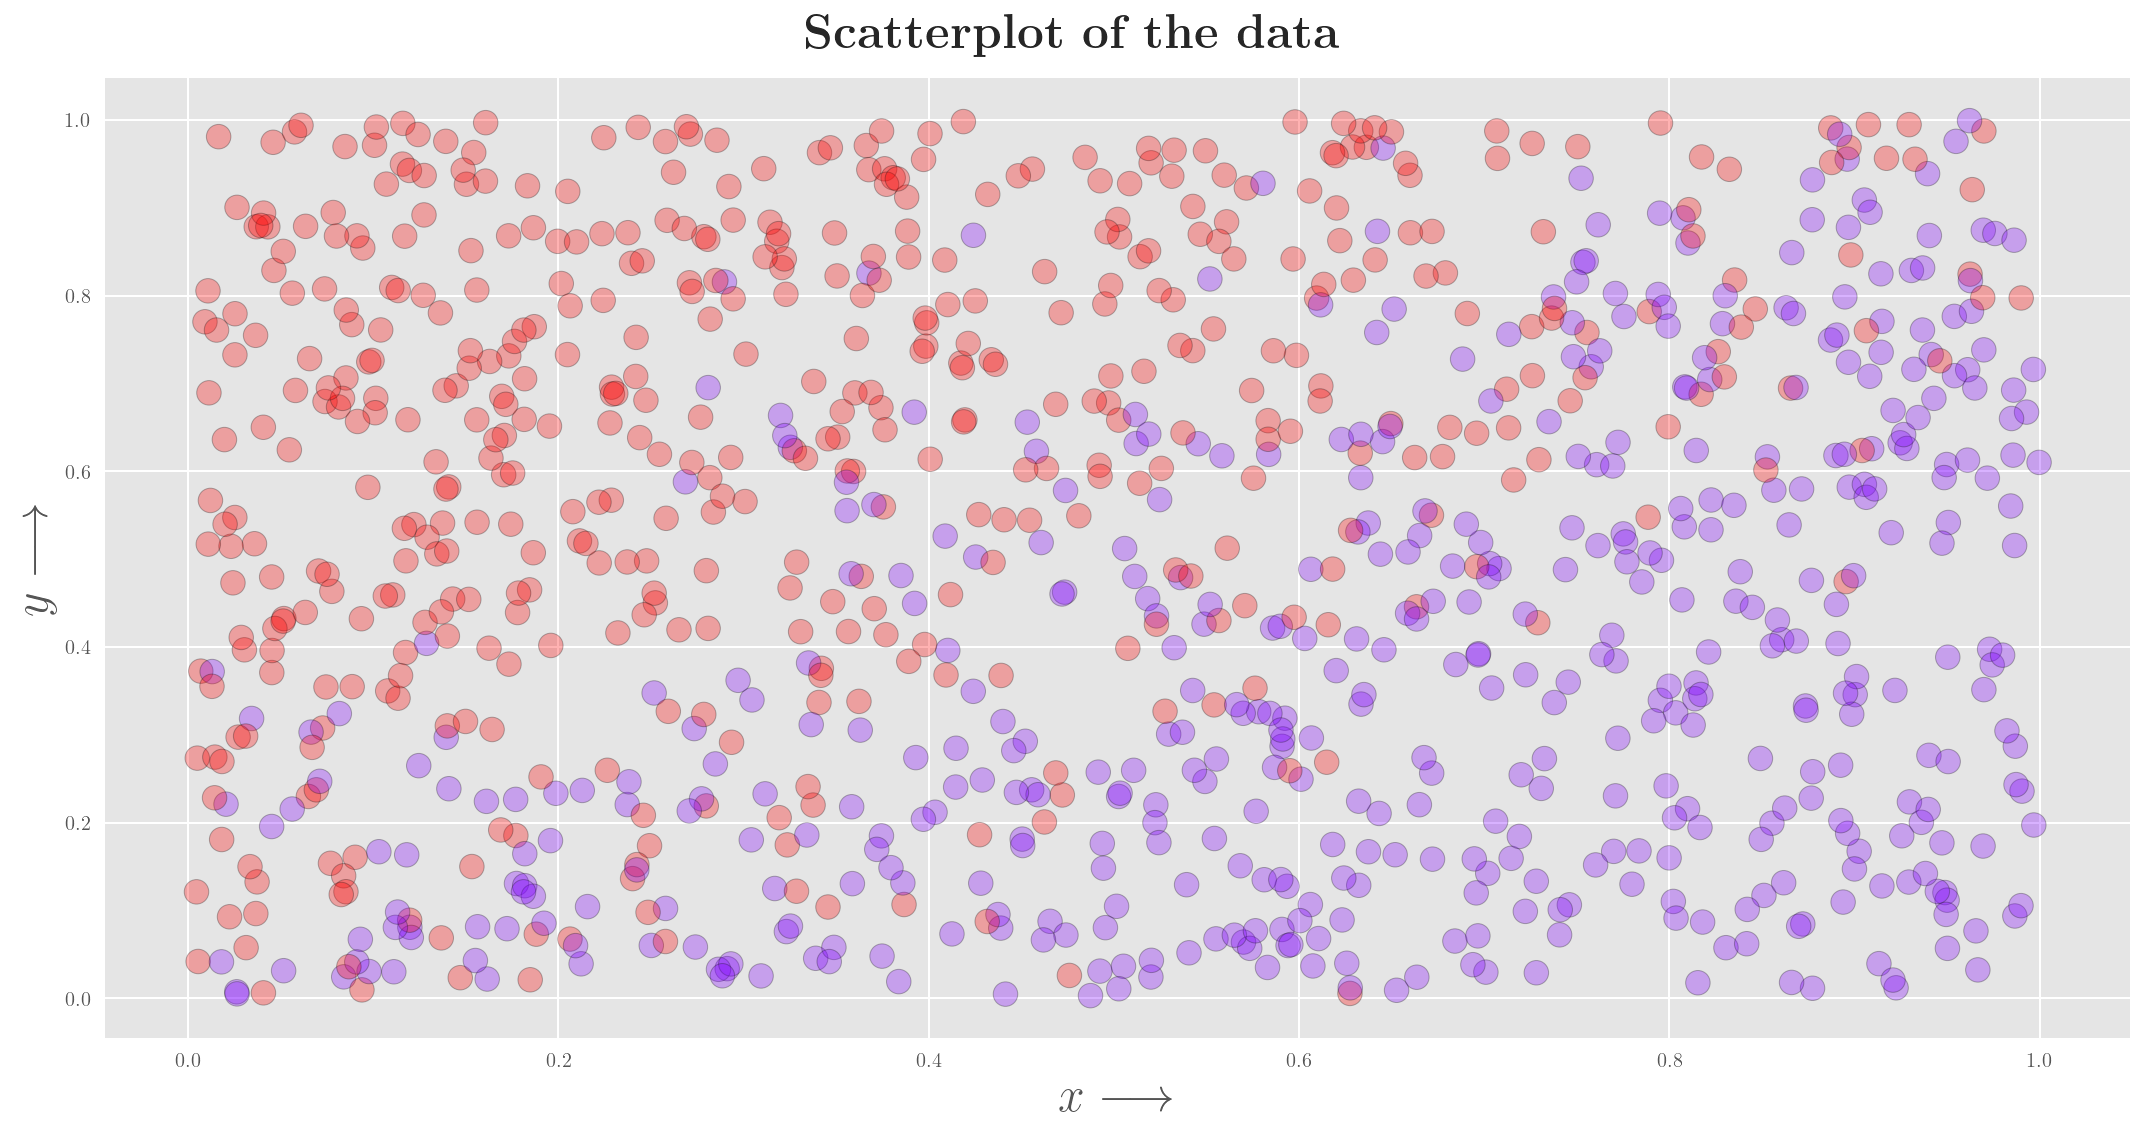

In [4]:
plt.figure(figsize=(15, 8));
plt.scatter(data.x, data.y, c=data.t,  cmap = 'rainbow', alpha=0.3, s=150, edgecolor='k')
plt.suptitle(r'\textbf{Scatterplot of the data}', size=24)
plt.xlabel(r'$x\longrightarrow$', size=24)
plt.ylabel(r'$y\longrightarrow$', size=24)
plt.tight_layout()

## A simple nearest neighbor classifier

Let us consider the simplest neighbor classifier, where we classify a test point into the class of its nearest neighbor in the training set.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
X, y= data[['x', 'y']], data.t
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### A very complicated decision boundary!

When we plot this below, we notice that the decision boundary seems extraordinarily complex. Clearly, our model is overfitting the data.

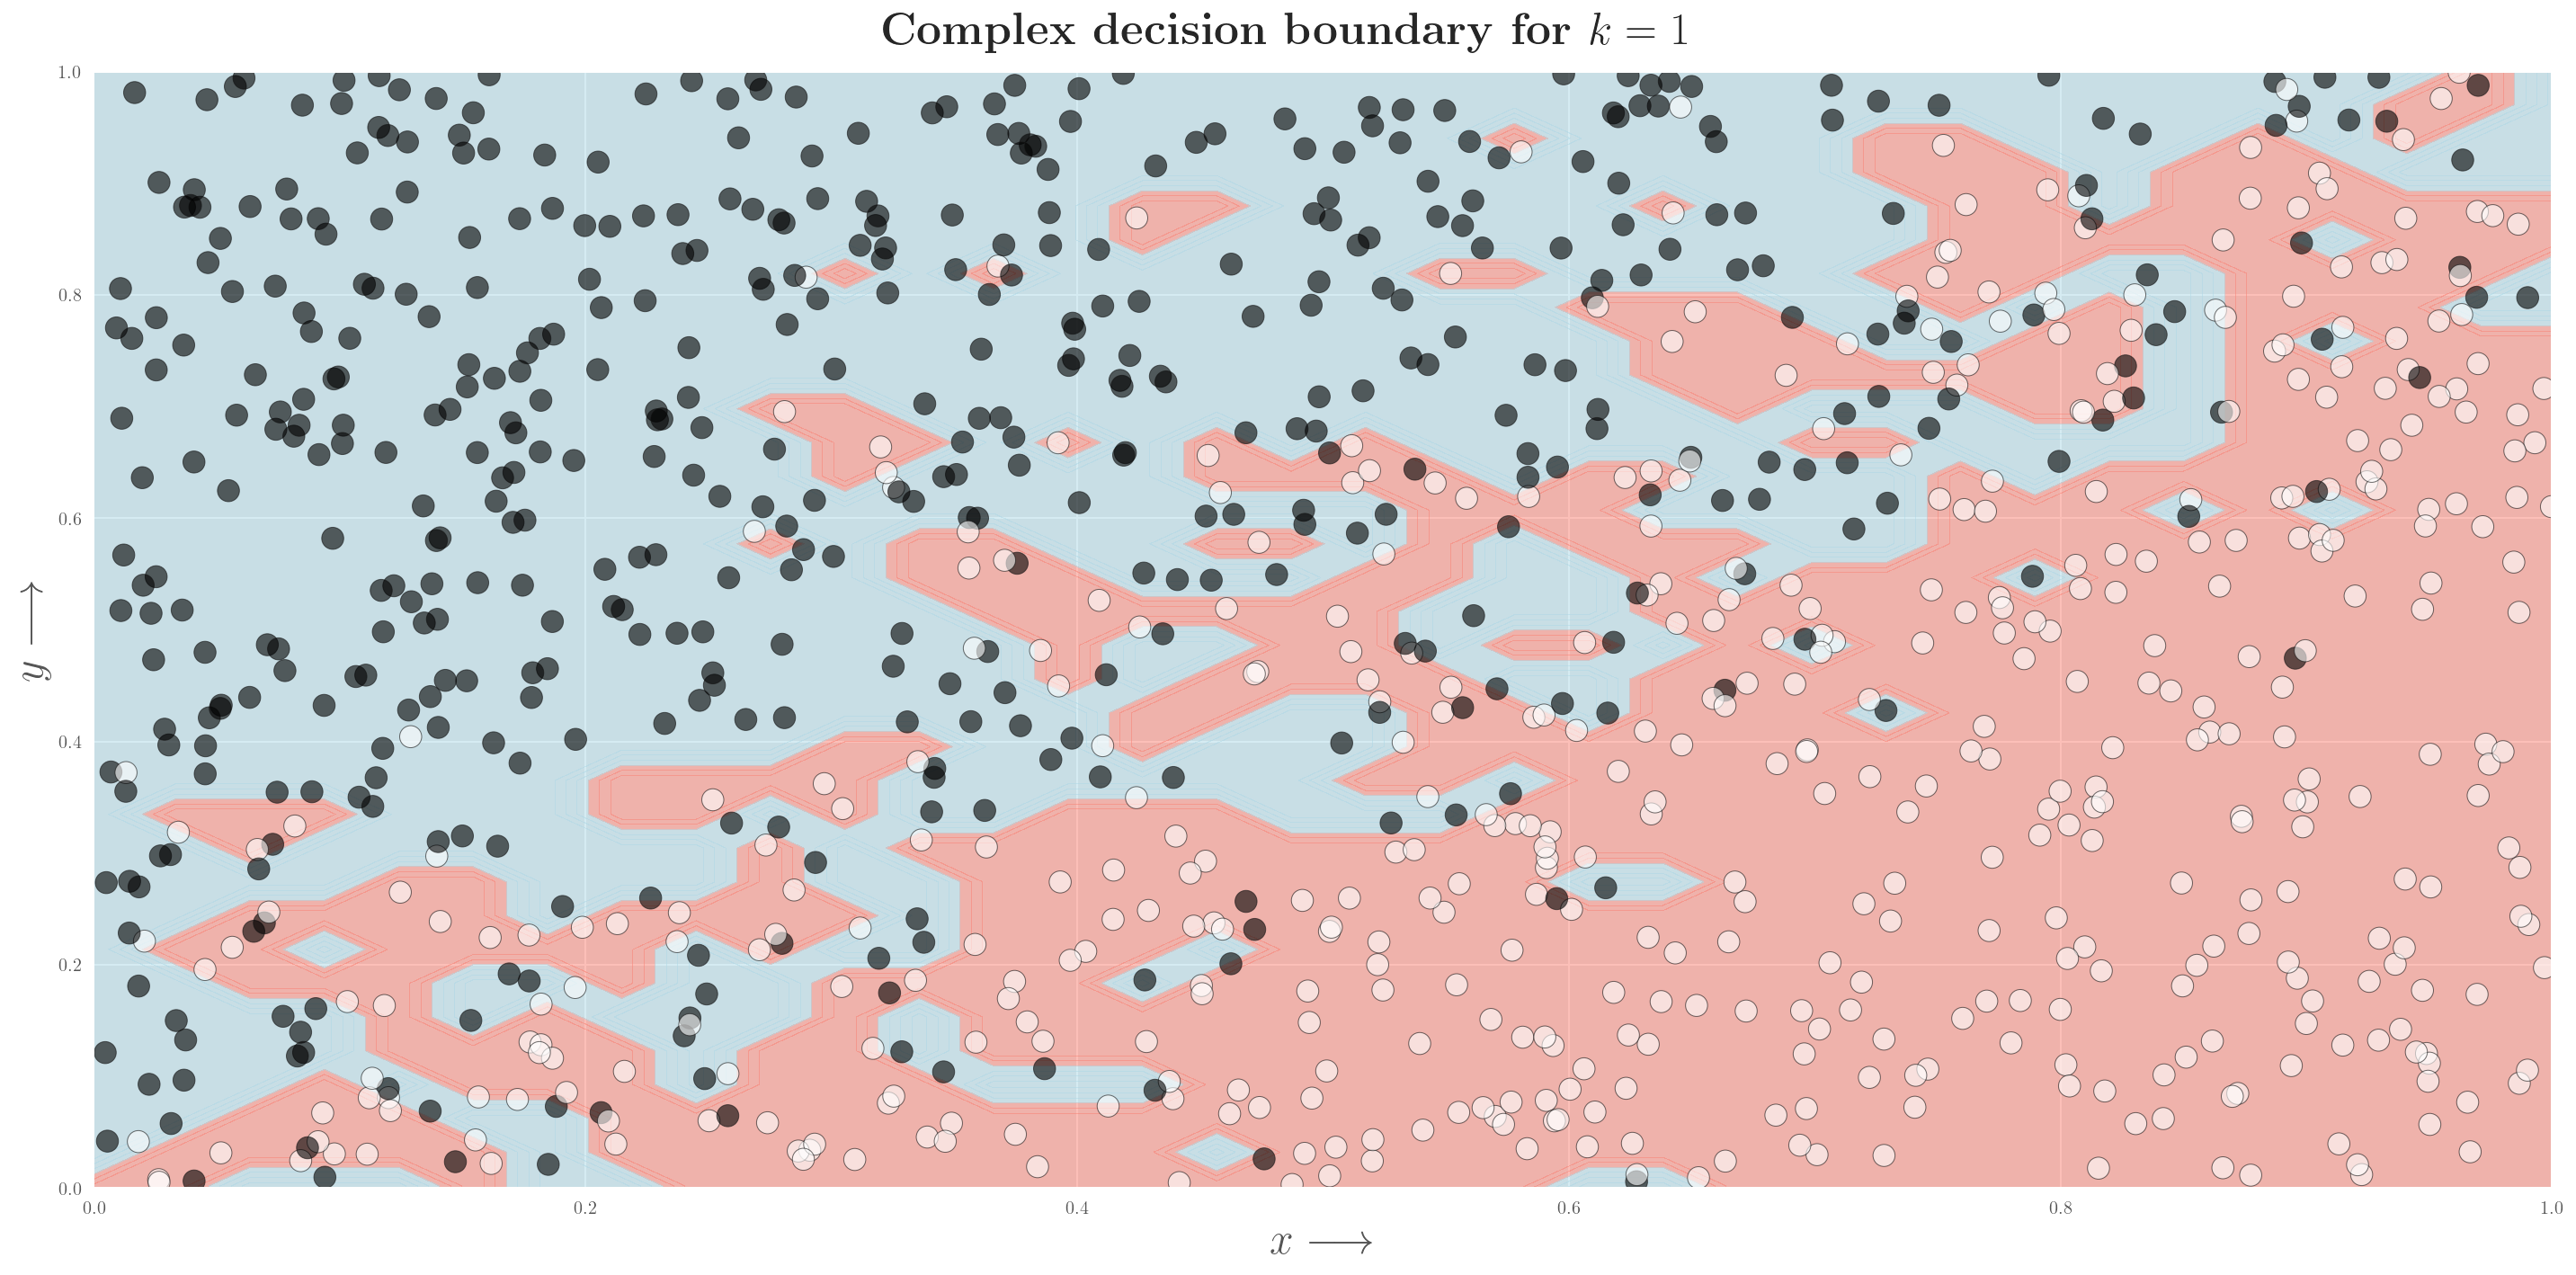

In [19]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
cmap_colors = ListedColormap(['salmon', 'lightblue'])
disp = DecisionBoundaryDisplay.from_estimator(clf, 
                                              X, 
                                              response_method='predict', 
                                              plot_method='contourf', 
                                              shading='auto',
                                              xlabel = 'x', 
                                              ylabel='y',
                                              cmap=cmap_colors,
                                              alpha=0.5
                                             )

plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(data.x, data.y, c=data.t,   alpha=0.6, s=150, edgecolor='k')
plt.suptitle(r'\textbf{Complex decision boundary for $k=1$}', size=25)
plt.xlabel(r'$x\longrightarrow$', size=24)
plt.ylabel(r'$y\longrightarrow$', size=24)
plt.tight_layout()

Let us start by splitting the data into the test and train subsets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Hyperparameter tuning

In the previous lab, we realized that the classifier's decision boundary is very sensitive to the choice of the hyperparameter $\mathbf{k}$, the number of neighors. In particular, low $k$ leads to high variance, overfitting models while high $k$ leads to low variance, high-bias, underfit models.

What would happen if we used a kernelized approach, where the influence of further off neighbors attenuates with distance? Let us explore this in the below excercise.

We do this by changing the `weights='distance'` argument to the constructor of the classifier.

Now, let us build a series of classifiers for different values of the hyperparameter $k$.

In [10]:
from sklearn.metrics import accuracy_score
k_value = []
accuracy = []
model = []
for k in range(1,105,5):
    clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf.fit(X_train, y_train)
    ŷ = clf.predict(X_test)
    acc = accuracy_score(y_test, ŷ)
    k_value.append(k)
    accuracy.append(acc)
    model.append(clf)

### Plot of accuravy vs the hyperparameter $k$

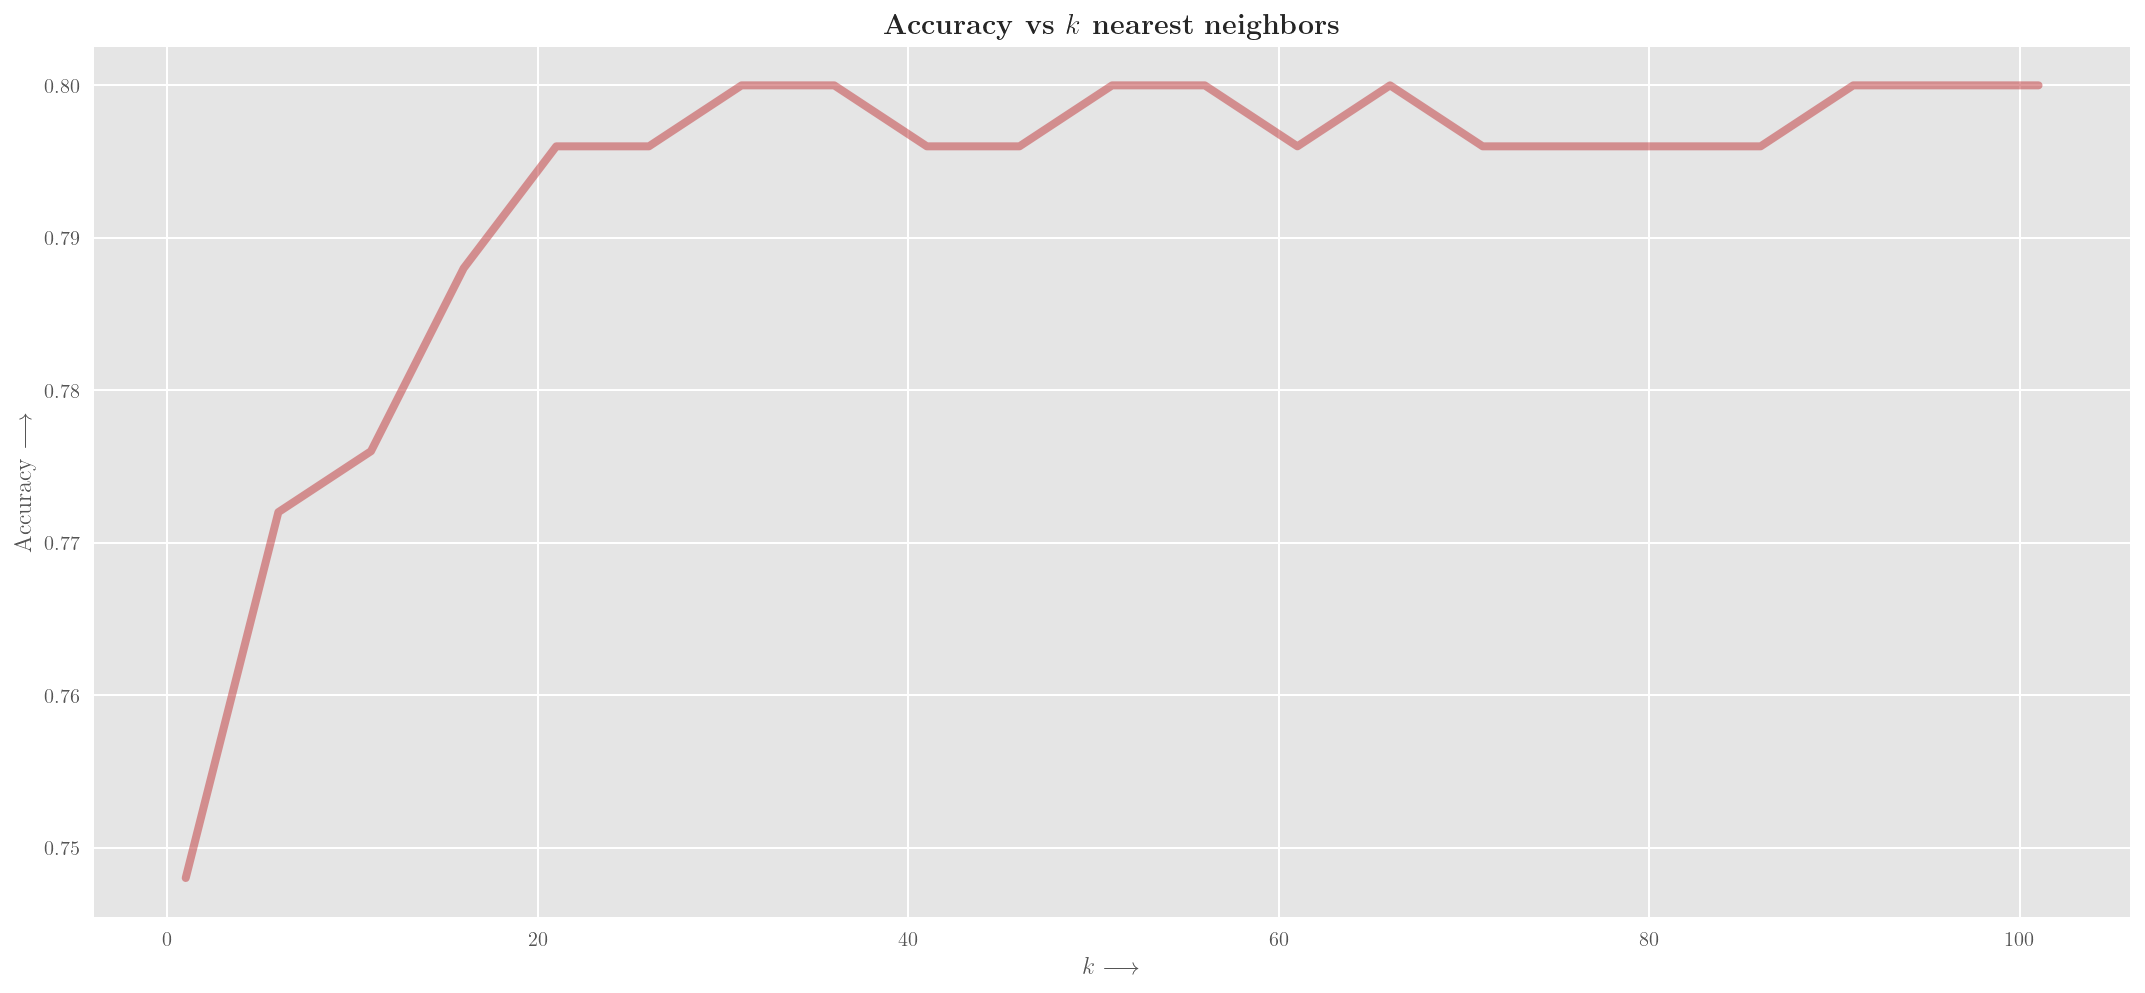

In [11]:
plt.figure(figsize=(15, 7));
plt.plot(k_value, accuracy, linewidth=4, alpha=0.5)
plt.xlabel(r'$k\longrightarrow$')
plt.ylabel(r'Accuracy $\longrightarrow$')
plt.title(r'\textbf{Accuracy vs $k$ nearest neighbors}')
plt.tight_layout()

In [12]:
metrics_data = pd.DataFrame(data={'k': k_value, 'accuracy': accuracy})
metrics_data.head(25)

k  accuracy
0     1     0.748
1     6     0.772
2    11     0.776
3    16     0.788
4    21     0.796
5    26     0.796
6    31     0.800
7    36     0.800
8    41     0.796
9    46     0.796
10   51     0.800
11   56     0.800
12   61     0.796
13   66     0.800
14   71     0.796
15   76     0.796
16   81     0.796
17   86     0.796
18   91     0.800
19   96     0.800
20  101     0.800

## Decision boundary vs $k$

Let us observe how the shape of he decision boundary changes for different values of $k$.

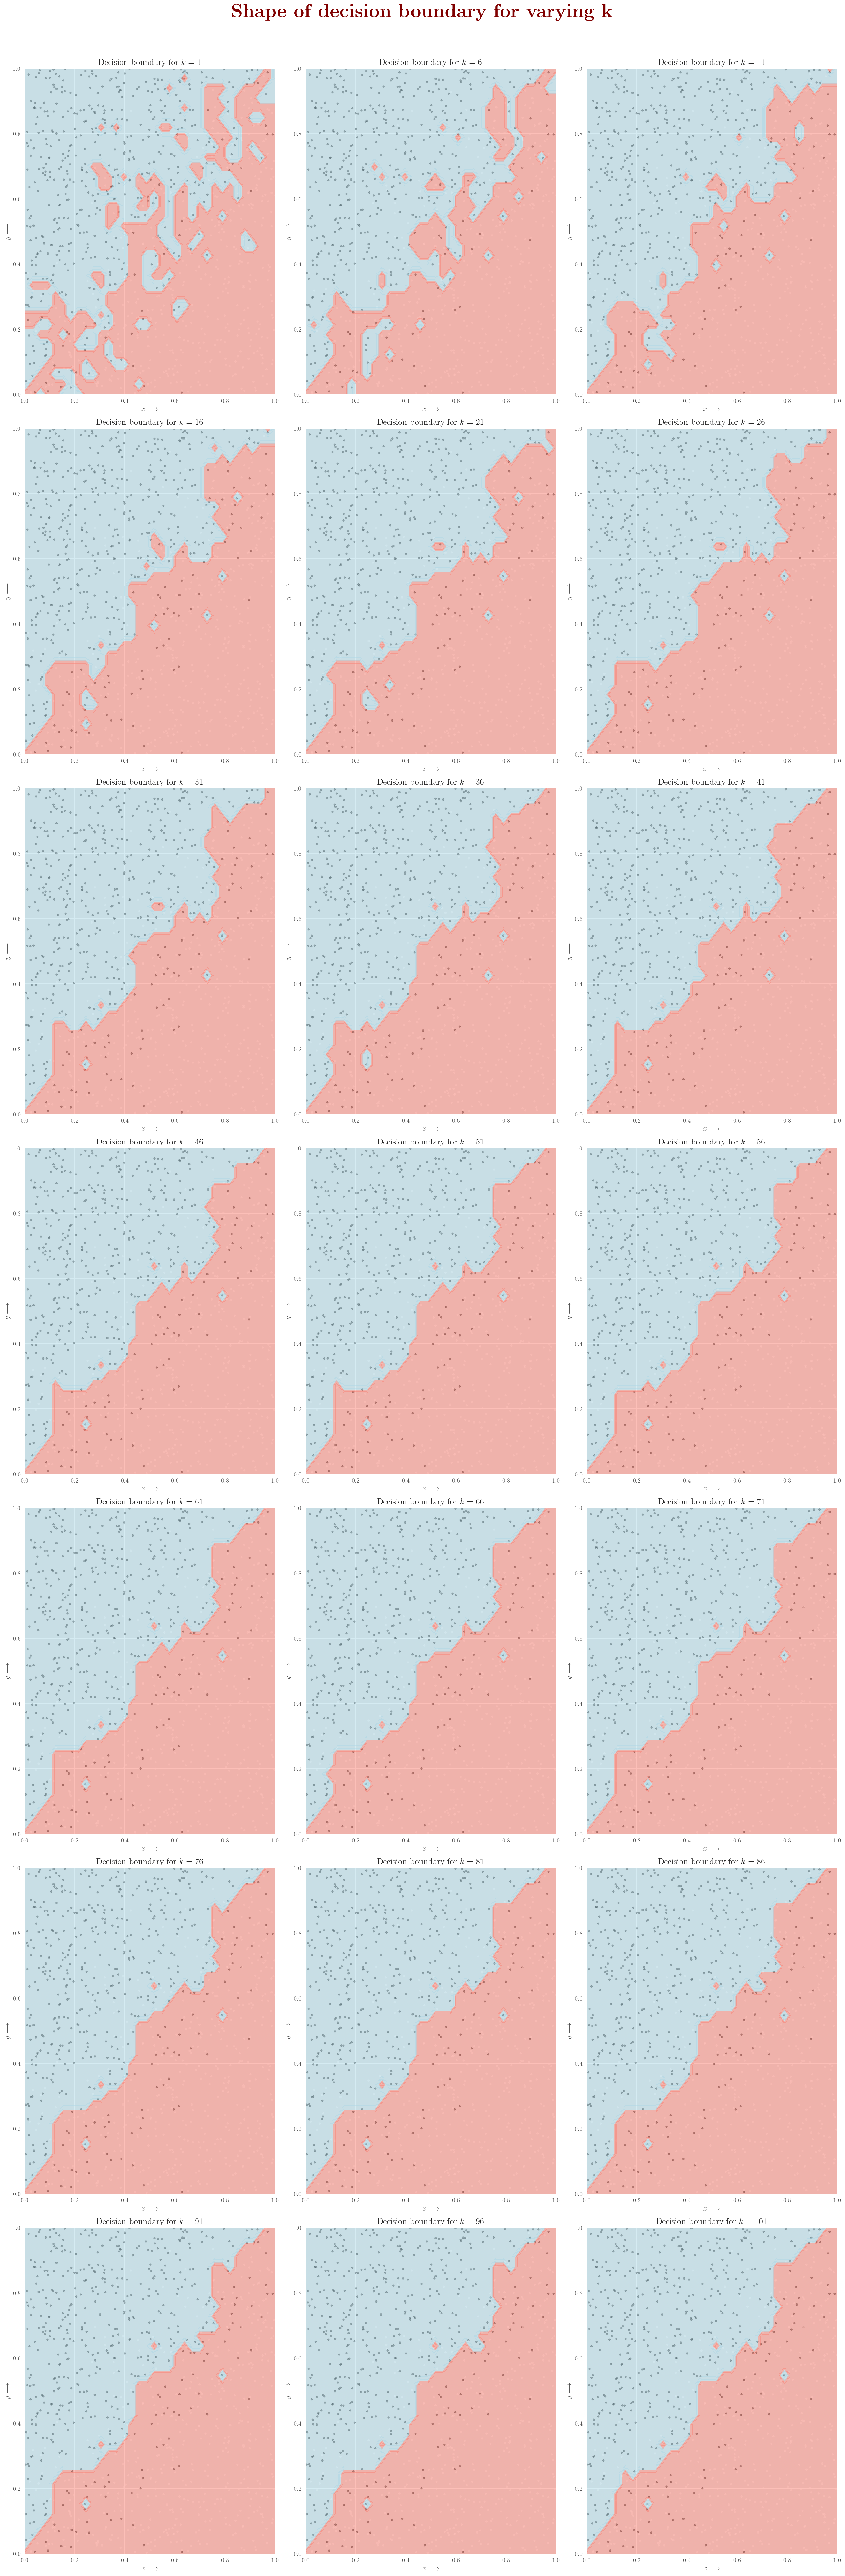

In [13]:
#plt.figure(figsize=(200, 1000));

fig = plt.figure(figsize=(20, 60))
fig.suptitle(r'\textbf{Shape of decision boundary for varying k}', y=1.01, size=32, color='maroon')
plt.subplots_adjust(hspace=0.4,  # vertical spacing between subplots
                    wspace=.3)   # horizontal spacing between subplots
#
# Loop through the models
for i in range (len(model)):
    ax = fig.add_subplot(7,3,i+1)
    k  = k_value[i]
    ax.set_title(rf'Decision boundary for $k={k}$')
    ax.set_xlabel(r'$x\longrightarrow$')
    ax.set_ylabel(r'$y\longrightarrow$')
    ax.scatter (data.x, data.y, s=10, alpha=0.5, c=data.t)
    
    disp = DecisionBoundaryDisplay.from_estimator(model[i], 
                                              X, 
                                              response_method='predict', 
                                              plot_method='contourf', 
                                              shading='auto',
                                              xlabel = 'x', 
                                              ylabel='y',
                                              cmap=cmap_colors,
                                              alpha=0.5,
                                              ax=ax
                                             )

    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    
    
    ax.margins = (10,10)

# Finally, show the whole plot    
plt.tight_layout()

## Choosing a different minkowski norm

What would happen if we replaced the distance measure from Euclidean to Manhattan?

Redo the whole notebook with the change. Can you explain why this happens?